In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import nltk
from nltk.tokenize import word_tokenize

import json
import math

#!pip install emoji
from emoji import UNICODE_EMOJI

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#API key 
#API key secret 
#bearer token 
#Access token 
#Acces token secret

In [5]:

file = open('#inflatie.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        if tweets[i]["data"][0]["lang"] == 'nl':
            temp.append(tweets[i]["data"][0])
            user = [k for k in tweets[0]["includes"]["users"] 
                    if k["id"] == tweets[i]["data"][j]["author_id"]]
            temp.append(user)
            data.append(temp)
len(data)

35864

In [6]:
import time 

features = []
for x in range(0,len(data)):
    temp = []
    if data[x][1] != []:
        followers_count = data[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(-1)

    tweetcount = -1 
    if data[x][1] != []:        
        tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(-1)

    qmarks = "?" in data[x][0]["text"]
    temp.append(int(qmarks))

    if data[x][1] != []:
        verified = data[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(-1)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data[x][1] != []:    
        ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
        temp.append(ratio)
    else:
        temp.append(999999)
        
    emark = "!" in data[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
    temp.append(capitalletters)

    retweet_count = data[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data[x][0]["text"]
    temp.append(int(hashtags))
    
    if data[x][1] != []:
        following = data[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(-1)

    text_length = len(data[x][0]["text"])
    temp.append(text_length)
    
    if data[x][1] != []:    
        listed_count = data[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(-1)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(999999)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data[x][1] != []:
        has_url = "profile_image_url" in data[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(-1)
        
    fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

In [7]:
[type(x) for x in features[0]]

[int,
 int,
 int,
 int,
 float,
 float,
 int,
 float,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 float,
 list,
 float,
 int,
 int,
 int]

Text(0, 0.5, 'frequency')

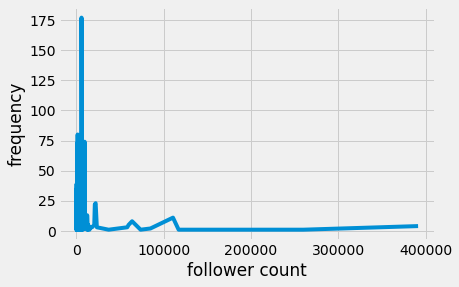

In [6]:
plt.style.use("fivethirtyeight")
unique, counts = np.unique([x[0] for x in features], return_counts=True)
plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("follower count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

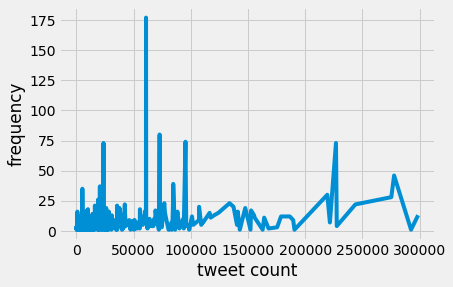

In [7]:
unique, counts = np.unique([x[1] for x in features], return_counts=True)
plt.plot(unique[1:-7], counts[1:-7])
plt.xlabel("tweet count")
plt.ylabel("frequency")

In [8]:
unique, counts = np.unique([x[2] for x in features], return_counts=True)
counts
#qmarks

array([32471,  3393], dtype=int64)

In [9]:
unique, counts = np.unique([x[3] for x in features], return_counts=True)
counts

#verified 


array([32864,  2970,    30], dtype=int64)

Text(0, 0.5, 'frequency')

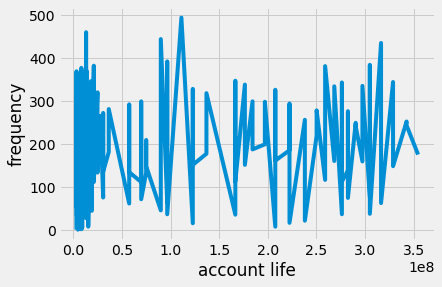

In [10]:
unique, counts = np.unique([x[4] for x in features], return_counts=True)
plt.plot(unique[:-1], counts[:-1])
plt.xlabel("account life")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

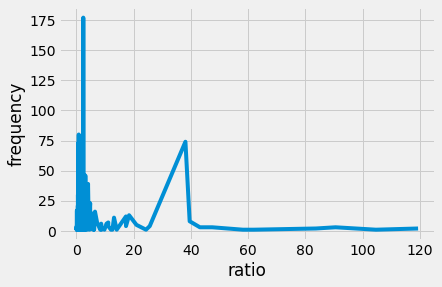

In [11]:
unique, counts = np.unique([x[5] for x in features], return_counts=True)
plt.plot(unique[:-10], counts[:-10])
plt.xlabel("ratio")
plt.ylabel("frequency")

In [12]:
unique, counts = np.unique([x[6] for x in features], return_counts=True)
counts

#exclamation points 

array([33406,  2458], dtype=int64)

Text(0, 0.5, 'frequency')

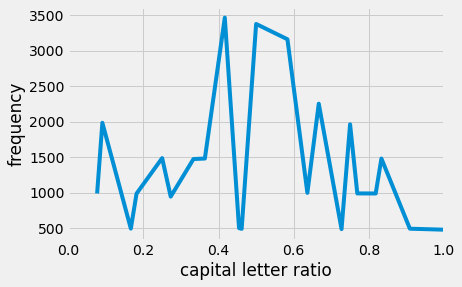

In [13]:
unique, counts = np.unique([x[7] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("capital letter ratio")
plt.xlim(0,1)
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

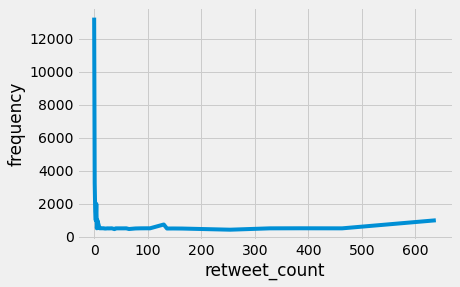

In [14]:
unique, counts = np.unique([x[8] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("retweet_count")
plt.ylabel("frequency")

In [15]:
unique, counts = np.unique([x[9] for x in features], return_counts=True)
counts

#hashtags

array([ 3697, 32167], dtype=int64)

Text(0, 0.5, 'frequency')

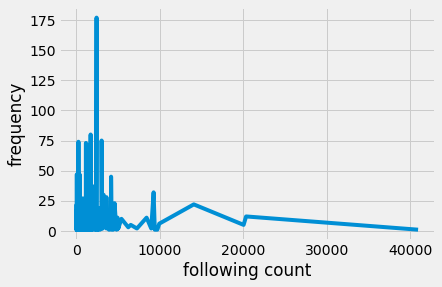

In [16]:
unique, counts = np.unique([x[10] for x in features], return_counts=True)
plt.plot(unique[1:], counts[1:])
plt.xlabel("following count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

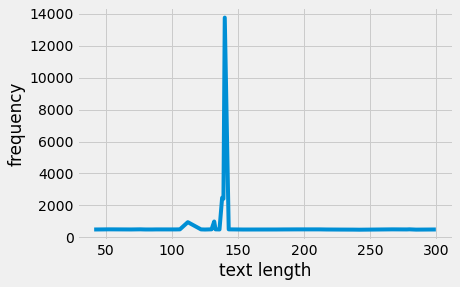

In [17]:
unique, counts = np.unique([x[11] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("text length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

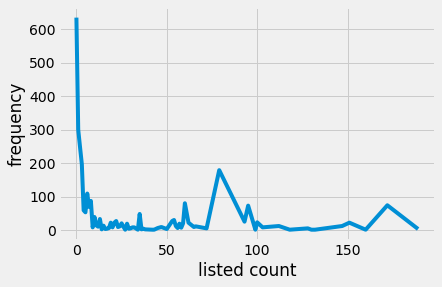

In [18]:
unique, counts = np.unique([x[12] for x in features], return_counts=True)
plt.plot(unique[1:-20], counts[1:-20])
plt.xlabel("listed count")
plt.ylabel("frequency")

In [19]:
unique, counts = np.unique([x[13] for x in features], return_counts=True)
counts

#emoticons

array([34418,  1446], dtype=int64)

Text(0, 0.5, 'frequency')

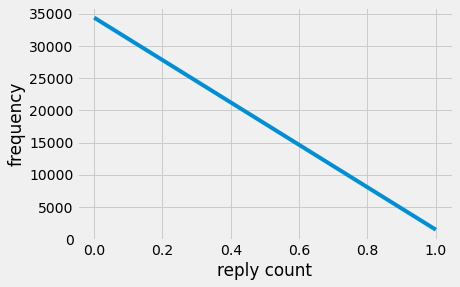

In [20]:
unique, counts = np.unique([x[14] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("reply count")
plt.ylabel("frequency")

In [21]:
unique, counts = np.unique([x[15] for x in features], return_counts=True)
counts

#quote count 

array([35371,   493], dtype=int64)

Text(0, 0.5, 'frequency')

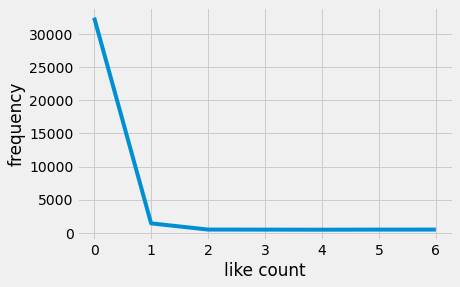

In [22]:
unique, counts = np.unique([x[16] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("like count")
plt.ylabel("frequency")


Text(0, 0.5, 'frequency')

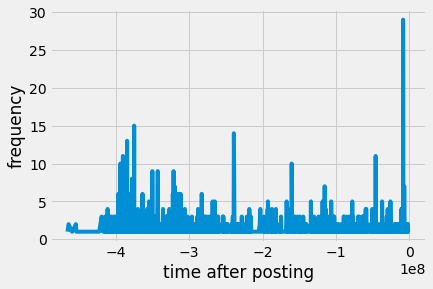

In [23]:
unique, counts = np.unique([x[17] for x in features], return_counts=True)
counts

plt.plot(unique[:-1], counts[:-1])
plt.xlabel("time after posting")
plt.ylabel("frequency")

#time after posting 


In [24]:
unique, counts = np.unique([x[18] for x in features], return_counts=True)
counts

#pos tags

C:\Users\nickv\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


array([499, 500, 496, 497, 482, 477, 492, 497, 495, 491, 494, 491, 497,
       497, 490, 495, 488, 496, 452, 485, 499, 498, 482, 490, 310, 497,
       449, 464, 491, 414, 729, 496, 500, 494, 455, 497, 496, 484, 497,
       985, 484, 495, 500, 495, 488, 495, 497, 498, 489, 486, 499, 500,
       490, 500, 500, 485, 500, 488, 499, 500, 498, 495, 490, 498, 493,
       493, 492, 499, 500, 498, 491, 491], dtype=int64)

Text(0, 0.5, 'frequency')

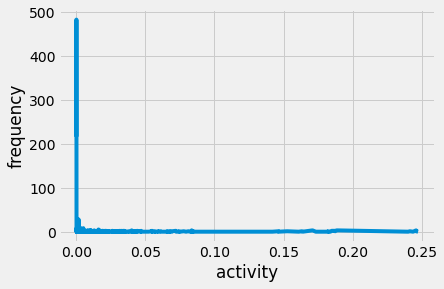

In [25]:
unique, counts = np.unique([x[19] for x in features], return_counts=True)
counts

plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("activity")
plt.ylabel("frequency")

In [26]:
unique, counts = np.unique([x[20] for x in features], return_counts=True)
counts

#has profile pic 

array([32864,  3000], dtype=int64)

In [27]:
unique, counts = np.unique([x[21] for x in features], return_counts=True)
print(unique)
print(counts)

#fpp

[1]
[35864]


In [28]:
unique, counts = np.unique([x[22] for x in features], return_counts=True)
print(unique)
print(counts)

#possibly sensitive

[0]
[35864]


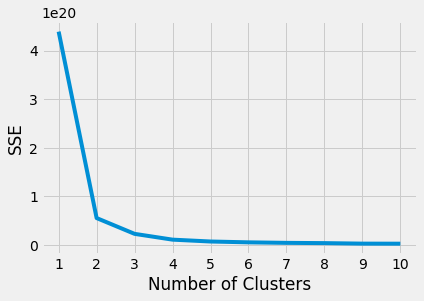

In [29]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs )
    kmeans.fit([x[0:17] for x in features])
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=3, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)

In [31]:
np.count_nonzero(labels == 1)

24153

In [32]:
np.count_nonzero(labels == 2)

6764

In [33]:
np.count_nonzero(labels == 0)

4947

In [34]:
len(labels)

35864

Text(0, 0.5, 'Tweets')

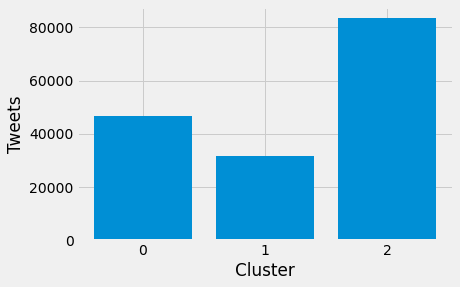

In [35]:
plt.style.use("fivethirtyeight")
plt.bar([0,1,2], [46534,31667,83432])
plt.xticks([0,1,2])
plt.xlabel("Cluster")
plt.ylabel("Tweets")

In [36]:

scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=2, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)

Text(0.5, 1.0, '#vleestaks')

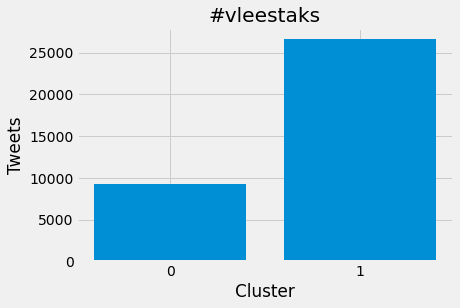

In [37]:
plt.style.use("fivethirtyeight")
zeros = np.count_nonzero(labels == 0)
ones = np.count_nonzero(labels == 1)
plt.bar([0,1], [zeros,ones])
plt.xticks([0,1])
plt.xlabel("Cluster")
plt.ylabel("Tweets")
plt.title("#vleestaks")

In [38]:
import html
import re
from nltk.stem import WordNetLemmatizer
def function_clean_tweet(text):
    # Escaping HTML characters
    text = html.unescape(text)
    text = str(text)
    # Removal of URLs (three-parter because the word tokenizer splits URLs like that)
    text = re.sub("https", "", text)
    text = re.sub(":", "", text)
    text = re.sub("//[^\s]*", "", text)
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Convert to lowercase
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [39]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

tweet_texts = [x[0]["text"] for x in data]
 
stop_words = set(stopwords.words('dutch'))
stop_words.add("inflatie")
stop_words.add("rt")
stop_words.add("http")

word_tokens = [word_tokenize(text, preserve_line=False) for text in tweet_texts]
 
filtered_sentences = [[w for w in tweet if not w.lower() in stop_words] for tweet in word_tokens]

all_words = [' '.join([x for x in f]) for f in filtered_sentences]
all_words = [function_clean_tweet([text]) for text in all_words]

count_vectorizer = CountVectorizer(stop_words=stop_words)
count_data = count_vectorizer.fit_transform(all_words)

lda = LDA(n_components=5, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_topics(lda, count_vectorizer, 20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topics found via LDA:

Topic #0:
ecb trias_politica energie land ra energieprijzen omhoog woningnood poetin fed munt werkgevers lonen rente spaargeld euro onbetaalbaar waard we prijzen

Topic #1:
hoge mensen eu weer land olieprijs olie minpres wel steed we jullie eurozone brandstofprijzen voedselprijzen blijft dft gelukkig lekker nederland

Topic #2:
procent meme steed harder juisteantwoord vandaag 12 januari mooi argentinië sportschool 85 voorbeeld peso peter_scheffer 440 530 contributie kwartaal steeg

Topic #3:
weer wel gaat nibud vroeger omhoog maand laat euro betalen pa president zegt eerst ewaldeng excessief geleende wederkerig eurodollar goldtwatter

Topic #4:
omhoog ecb gewoon vraag hoge dnb werkelijkheid loonstijging feit nederland benzineprijs 4ct 65 perrybraam janken morgen bestaat belastingen prijs dreigt


In [40]:
import pyLDAvis
import sklearn
import pyLDAvis.sklearn
#help(pyLDAvis)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

C:\Users\nickv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.041799  0.271422       1        1  23.845413
4      0.194784 -0.039904       2        1  22.122702
0      0.045964 -0.326941       3        1  21.080534
3      0.132429  0.093264       4        1  20.040685
2     -0.414975  0.002159       5        1  12.910665, topic_info=        Term         Freq        Total Category  logprob  loglift
246     hoge  3432.000000  3432.000000  Default  30.0000  30.0000
421  procent  2500.000000  2500.000000  Default  29.0000  29.0000
144      ecb  4389.000000  4389.000000  Default  28.0000  28.0000
592     weer  2947.000000  2947.000000  Default  27.0000  27.0000
157  energie  1416.000000  1416.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
531  vandaag   519.376168  1012.033111   Topic5  -4.6278   1.3800
2         12   519.006277  1013.002284   Topic5  -4.6285   1.3784
271  januari   518.873958   995.229939   Topic5  -4.6287   1.3958
415    prijs   516.837787  2437.100198   Topic5  -4.6327   0.4963
236       gt   516.793246  1007.879483   Topic5  -4.6328   1.3792

[241 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         3  0.998845           10
2         1  0.486672           12
2         5  0.512338           12
4         1  0.486551           15
4         3  0.513127           15
...     ...       ...          ...
615       2  0.420396         zien
615       4  0.290232         zien
616       4  0.999061         ziet
617       1  0.998986          zit
623       1  0.998986  zwitserland

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

In [41]:
import time 
#text = data2[x][0]["text"]

features = []
for x in range(0,len(data)):
    temp = []
    if data[x][1] != []:
        followers_count = data[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(None)

    tweetcount = -1 
    if data[x][1] != []:        
        tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(None)

    qmarks = "?" in data[x][0]["text"]
    temp.append(int(qmarks))

    if data[x][1] != []:
        verified = data[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(None)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data[x][1] != []:    
        ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
        temp.append(ratio)
    else:
        temp.append(None)
        
    emark = "!" in data[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
    temp.append(capitalletters)

    retweet_count = data[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data[x][0]["text"]
    temp.append(int(hashtags))
    
    if data[x][1] != []:
        following = data[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(None)

    text_length = len(data[x][0]["text"])
    temp.append(text_length)
    
    if data[x][1] != []:    
        listed_count = data[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(None)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(None)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data[x][1] != []:
        has_url = "profile_image_url" in data[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(None)
        
    fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

In [8]:
np.array(features, dtype=object).shape

columns = ["followers",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_count",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
          "reply_count",
          "quote_count",
          "like_count",
          "time_after_posting",
          "pos_tags",
          "activity",
          "has_url",
          "has_first_person_pronouns",
          "possibly_sensitive"]
df = pd.DataFrame(data=features, index=None, columns=columns)

In [9]:
df

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,emoticons,reply_count,quote_count,like_count,time_after_posting,pos_tags,activity,has_url,has_first_person_pronouns,possibly_sensitive
0,682,21212,0,0,7269636.0,1.144054,0,1.083333,18,0,...,0,0,0,0,-29096081.0,"[(RT, NNP), (@, NNP), (overveenerick, NN), (:,...",2.917890e-03,1,1,0
1,68,14545,0,0,7269636.0,0.327014,0,1.083333,18,0,...,0,0,0,0,-6885233.0,"[(RT, NNP), (@, NNP), (overveenerick, NN), (:,...",2.000788e-03,1,1,0
2,389,3563,0,0,7269636.0,0.586466,0,1.083333,18,0,...,0,0,0,0,-169356200.0,"[(RT, NNP), (@, NNP), (overveenerick, NN), (:,...",4.901208e-04,1,1,0
3,425,29875,0,0,7269636.0,0.838583,0,1.083333,18,0,...,0,0,0,0,-365879594.0,"[(RT, NNP), (@, NNP), (overveenerick, NN), (:,...",4.109559e-03,1,1,0
4,464,6826,0,0,7269636.0,0.630936,0,1.083333,18,0,...,0,0,0,0,-357496327.0,"[(RT, NNP), (@, NNP), (overveenerick, NN), (:,...",9.389741e-04,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35859,-1,-1,0,-1,358462697.0,999999.000000,0,0.666667,1,1,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (ArendJanKamp, NNP), (:,...",-2.789691e-09,-1,1,0
35860,-1,-1,0,-1,358462697.0,999999.000000,0,0.666667,1,1,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (ArendJanKamp, NNP), (:,...",-2.789691e-09,-1,1,0
35861,-1,-1,0,-1,358462697.0,999999.000000,0,0.666667,1,1,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (ArendJanKamp, NNP), (:,...",-2.789691e-09,-1,1,0
35862,-1,-1,0,-1,358462697.0,999999.000000,0,0.666667,1,1,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (ArendJanKamp, NNP), (:,...",-2.789691e-09,-1,1,0


In [10]:
df.describe()

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,listed_count,emoticons,reply_count,quote_count,like_count,time_after_posting,activity,has_url,has_first_person_pronouns,possibly_sensitive
count,35864.000000,35864.000000,35864.000000,35864.000000,3.586400e+04,35864.000000,35864.000000,35864.000000,35864.000000,35864.000000,...,35864.000000,35864.000000,35864.000000,35864.000000,35864.000000,3.586400e+04,3.586400e+04,35864.000000,35864.0,35864.0
mean,350.413423,8409.610752,0.094607,-0.915514,8.777679e+07,916351.374018,0.068537,0.600376,57.011822,0.896916,...,3.140029,0.040319,0.041267,0.013746,0.271609,-1.695720e+07,6.560298e-04,-0.832701,1.0,0.0
std,6209.417853,51886.961134,0.292676,0.281111,1.106761e+08,276859.459585,0.252668,0.347546,131.007676,0.304073,...,45.629039,0.196709,0.198910,0.116438,1.034810,7.063225e+07,4.869213e-03,0.553730,0.0,0.0
min,-1.000000,-1.000000,0.000000,-1.000000,7.269636e+06,0.011494,0.000000,0.076923,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,-4.656637e+08,-1.373774e-07,-1.000000,1.0,0.0
25%,-1.000000,-1.000000,0.000000,-1.000000,1.071079e+07,999999.000000,0.000000,0.363636,0.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,-8.491673e-08,-1.000000,1.0,0.0
50%,-1.000000,-1.000000,0.000000,-1.000000,1.840409e+07,999999.000000,0.000000,0.583333,2.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,-3.974727e-08,-1.000000,1.0,0.0
75%,-1.000000,-1.000000,0.000000,-1.000000,1.706268e+08,999999.000000,0.000000,0.769231,40.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,-4.130648e-09,-1.000000,1.0,0.0
max,635714.000000,844424.000000,1.000000,1.000000,3.584627e+08,999999.000000,1.000000,1.615385,638.000000,1.000000,...,3619.000000,1.000000,1.000000,1.000000,6.000000,9.999990e+05,1.161577e-01,1.000000,1.0,0.0


In [11]:
#df = df.drop(["has_url",
#              "has_first_person_pronouns", 
#              "possibly_sensitive"], axis=1)

<AxesSubplot:>

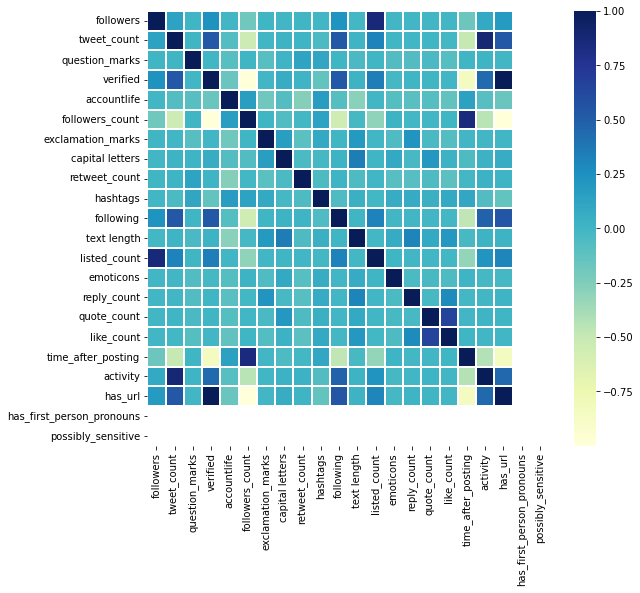

In [12]:
import seaborn as sns

corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)